# Data Visualization Project using R

A correlation between Corruption and Development: Corruption Perceptions Index , 2018 (Rating from 1 To 100 where 100 is the least corrupt nation) Human Developement Index, 2018 (Rating from 0.1 To 1.0 where 1 is best)

Data Source:
Human Development (HDI) Repot 2018:

http://hdr.undp.org/sites/default/files/composite_tables/2018_Statistical_Annex_Table_1.xlsx

Transparency International:

https://www.transparency.org/files/content/pages/2018_CPI_FullResults.zip


In [1]:
library(ggplot2)
library(data.table)

## Data Cleaning:

Data cleaning and merged data

In [2]:
df1 <- fread('2018_CPI_FullDataSet.csv')
head(df1)


Country,ISO3,Region,CPI
<chr>,<chr>,<chr>,<int>
Denmark,DNK,WE/EU,88
New Zealand,NZL,AP,87
Finland,FIN,WE/EU,85
Singapore,SGP,AP,85
Sweden,SWE,WE/EU,85
Switzerland,CHE,WE/EU,85


In [3]:
tail(df1)

Country,ISO3,Region,CPI
<chr>,<chr>,<chr>,<int>
Sudan,SDN,SSA,16
"Korea, North",PRK,AP,14
Yemen,YEM,MENA,14
South Sudan,SSD,SSA,13
Syria,SYR,MENA,13
Somalia,SOM,SSA,10


In [4]:
df2 <- fread('hdi.csv')
head(df2)

Country,HDI
<chr>,<dbl>
Norway,0.953
Switzerland,0.944
Australia,0.939
Ireland,0.938
Germany,0.936
Iceland,0.935


In [5]:
tail(df2)

Country,HDI
<chr>,<dbl>
Sierra Leone,0.419
Burundi,0.417
Chad,0.404
South Sudan,0.388
Central African Republic,0.367
Niger,0.354


In [6]:
x<- merge(df1,df2,by=c("Country"))

head(x)

Country,ISO3,Region,CPI,HDI
<chr>,<chr>,<chr>,<int>,<dbl>
Afghanistan,AFG,AP,16,0.498
Albania,ALB,ECA,36,0.785
Algeria,DZA,MENA,35,0.754
Angola,AGO,SSA,19,0.581
Argentina,ARG,AME,40,0.825
Armenia,ARM,ECA,35,0.755


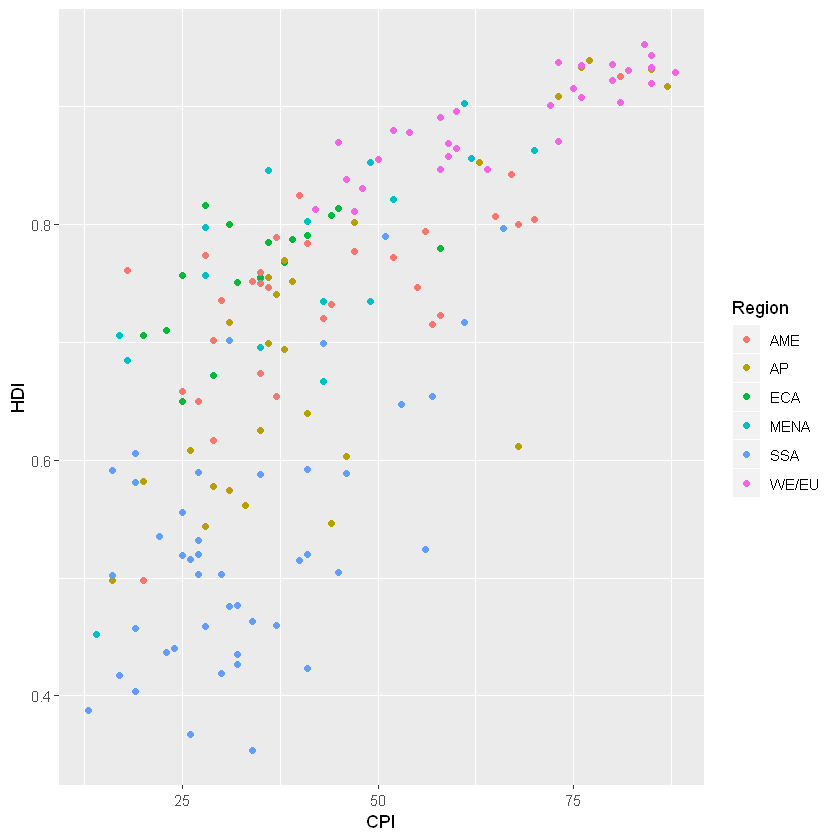

In [7]:
pl <- ggplot(x,aes(x=CPI,y=HDI,color=Region)) + geom_point()
pl

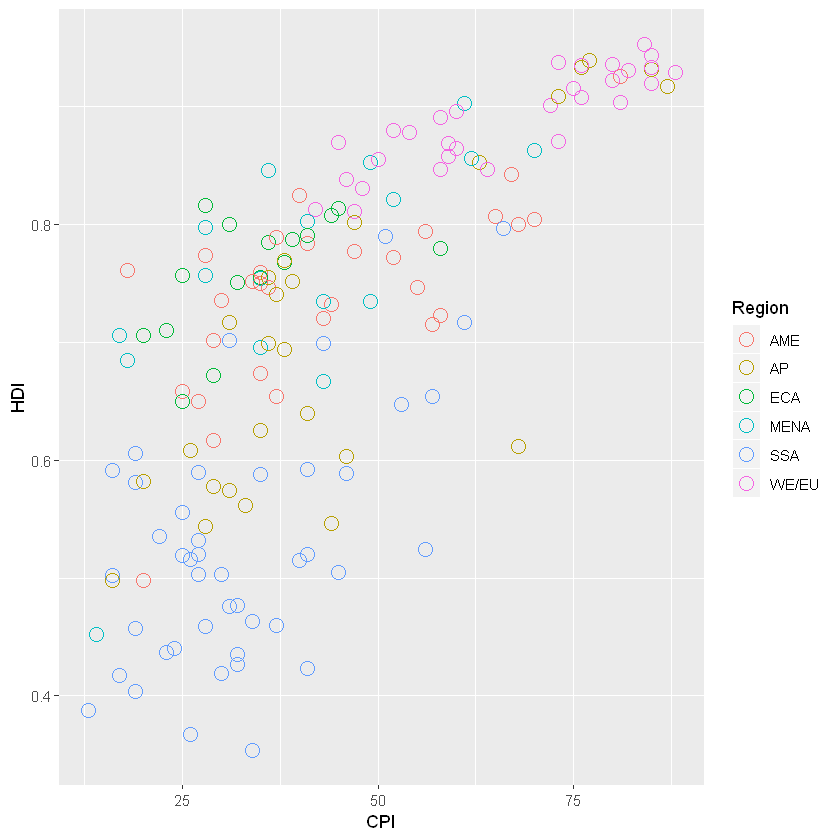

In [8]:
pl <- ggplot(x,aes(x=CPI,y=HDI,color=Region)) + geom_point(size=4,shape=1)
pl

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


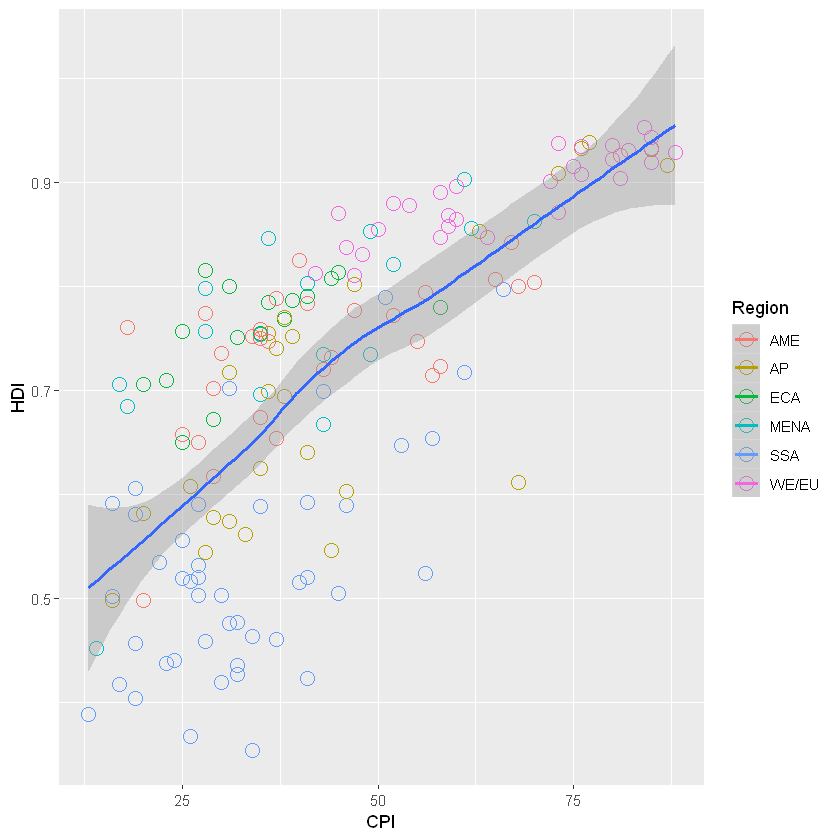

In [9]:
pl + geom_smooth(aes(group=1))

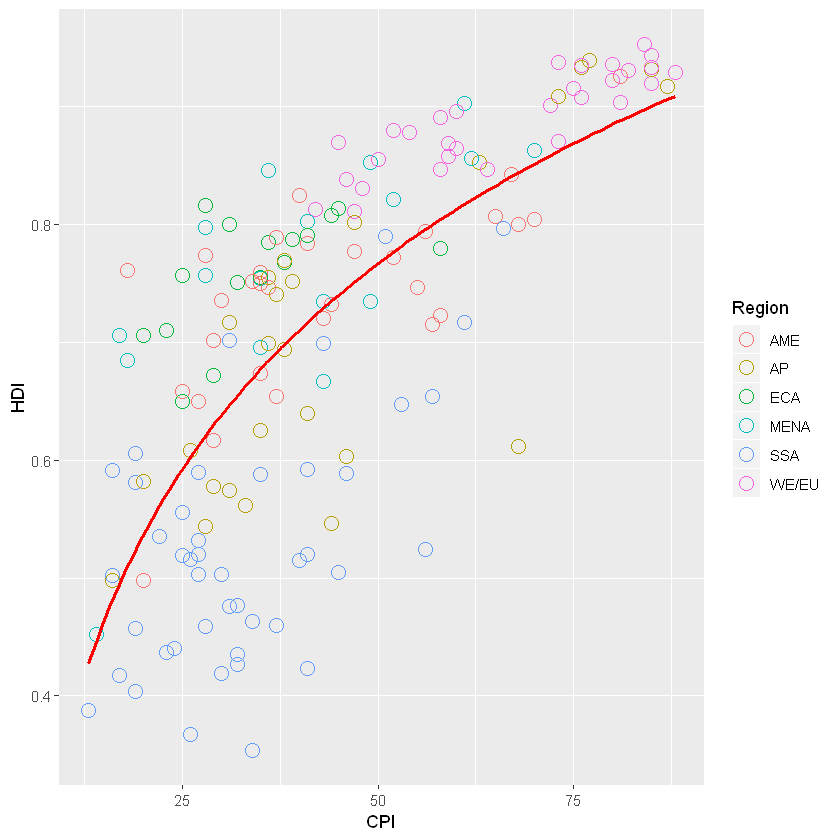

In [10]:
pl2 <- pl + geom_smooth(aes(group=1),method ='lm',formula = y~log(x),se=FALSE,color='red')
pl2

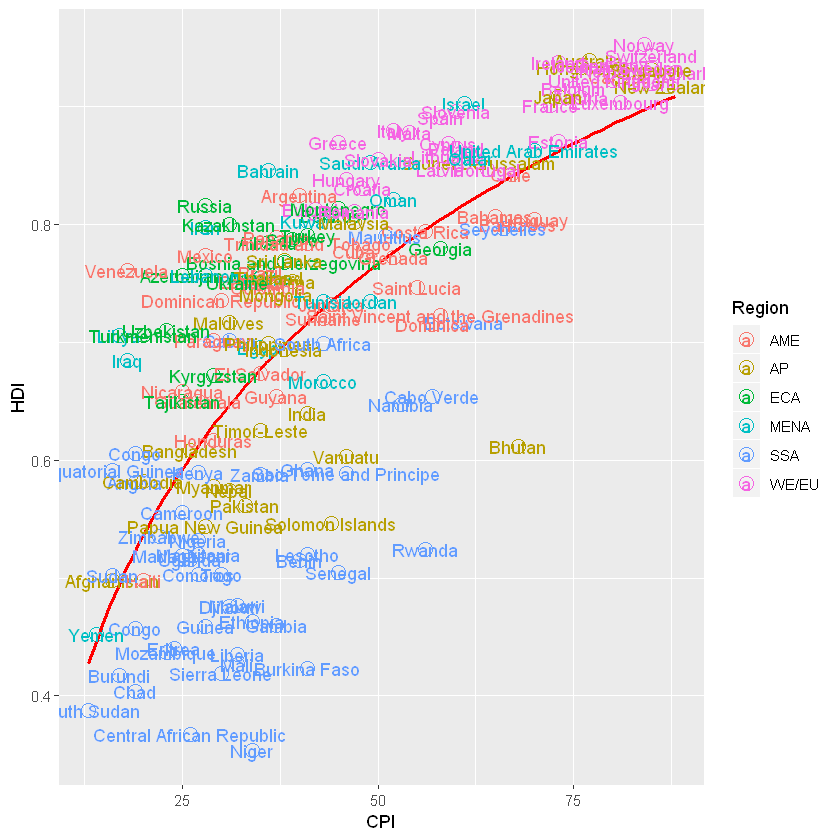

In [11]:
pl2 + geom_text(aes(label=Country))

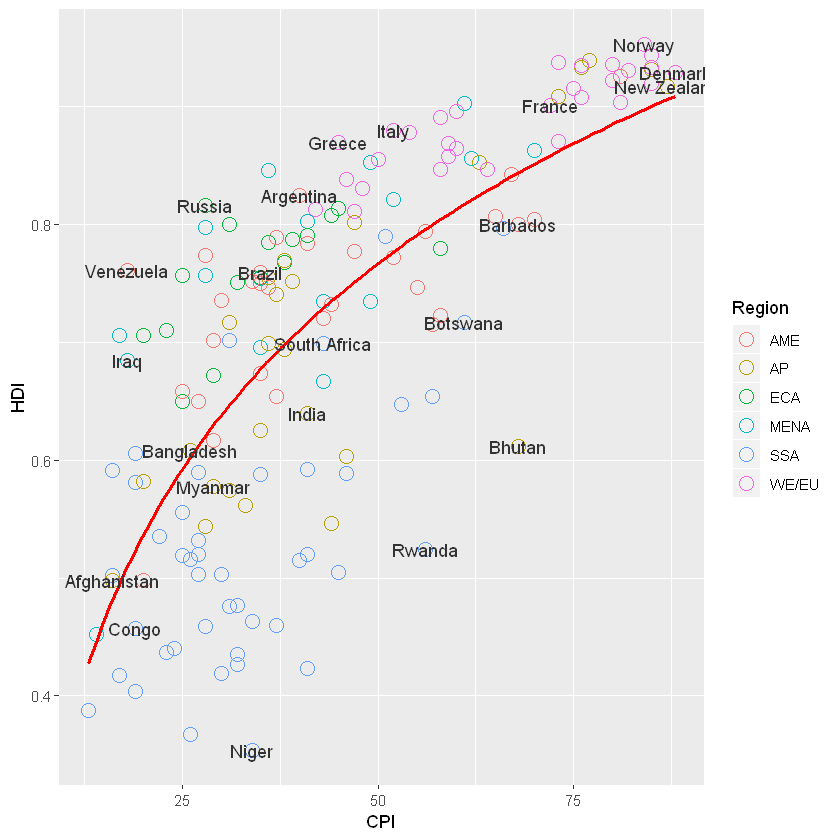

In [12]:
pointsToLabel <- c(  "Singapore","Bangladesh", "Russia", "Venezuela", "Iraq", "Myanmar", "Sudan",
                   "Afghanistan", "Congo", "Greece", "Argentina", "Brazil",
                   "India", "Italy", "China", "South Africa", "Spane",
                   "Botswana", "Cape Verde", "Bhutan", "Rwanda", "France",
                   "United States", "Germany", "Britain", "Barbados", "Norway", "Japan",
                   "New Zealand", "Finland","Denmark","Somalia", "Niger" )

pl3 <- pl2 + geom_text(aes(label = Country), color = "gray20", 
                data = subset(x, Country %in% pointsToLabel),check_overlap = TRUE)

pl3

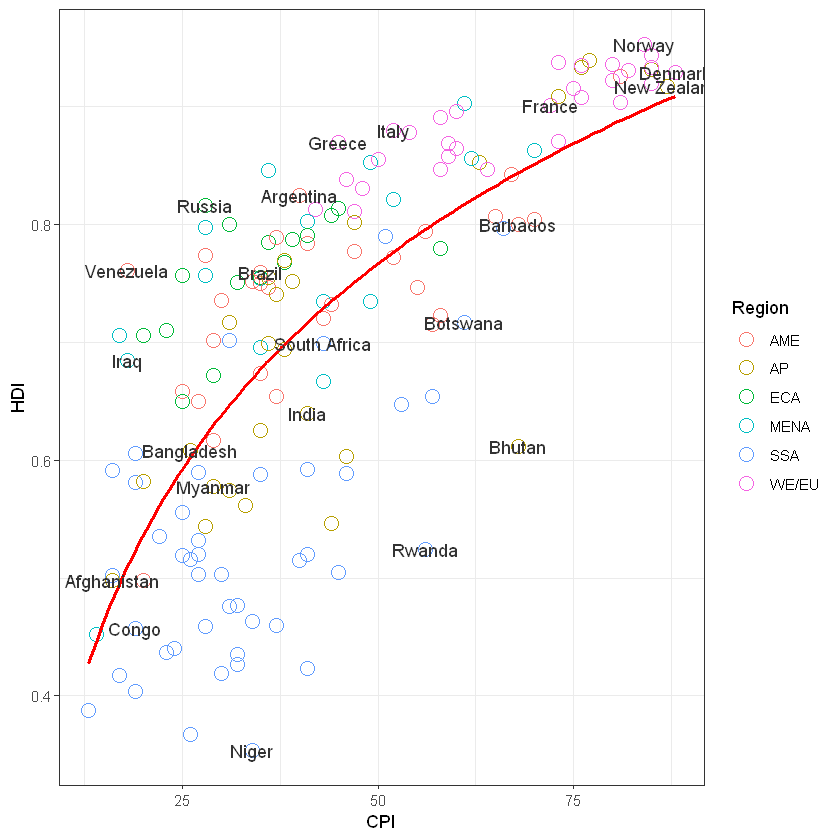

In [13]:
pl4 <- pl3 + theme_bw() 
pl4

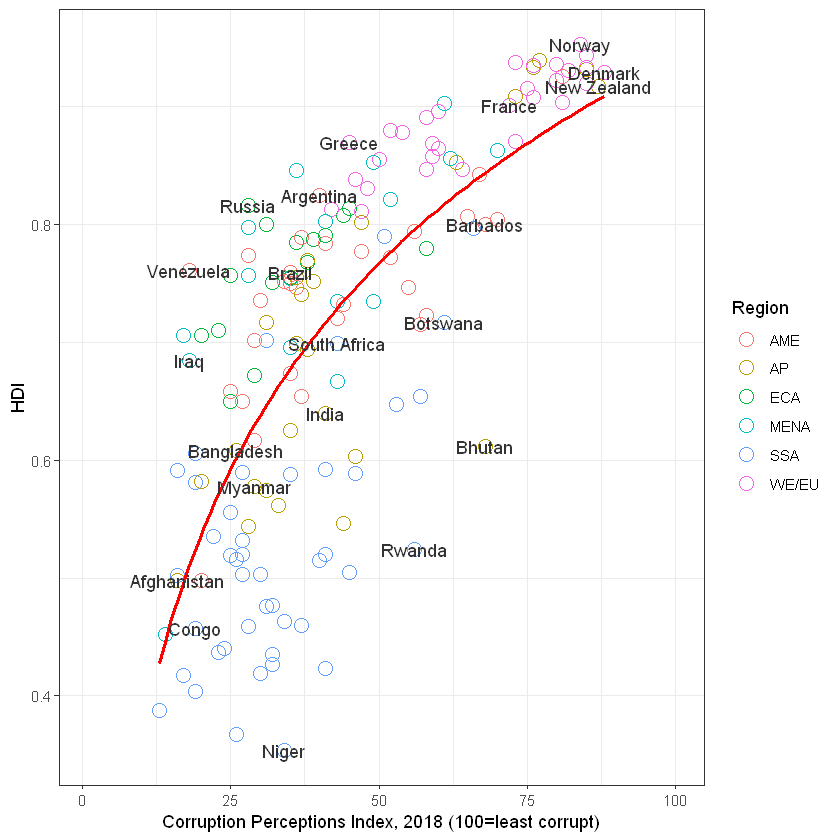

In [14]:
pl5 <- pl4 + scale_x_continuous(name = "Corruption Perceptions Index, 2018 (100=least corrupt)",
                     limits = c(1, 100)) 
pl5

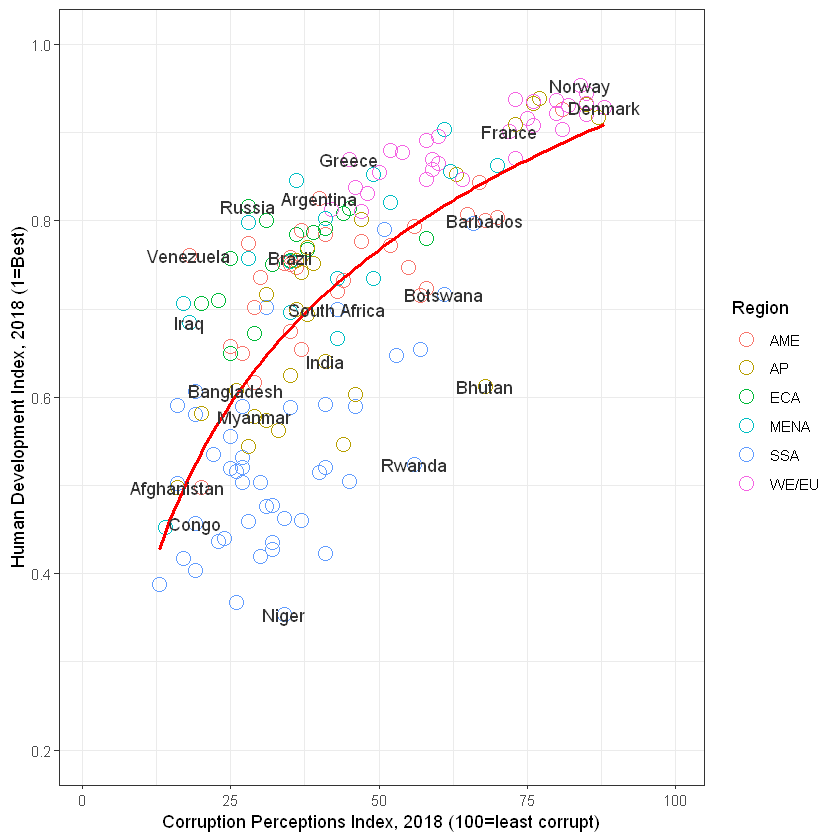

In [15]:
pl6 <- pl5 + scale_y_continuous(name ="Human Development Index, 2018 (1=Best)",
                     limits = c(0.2, 1.0))
pl6

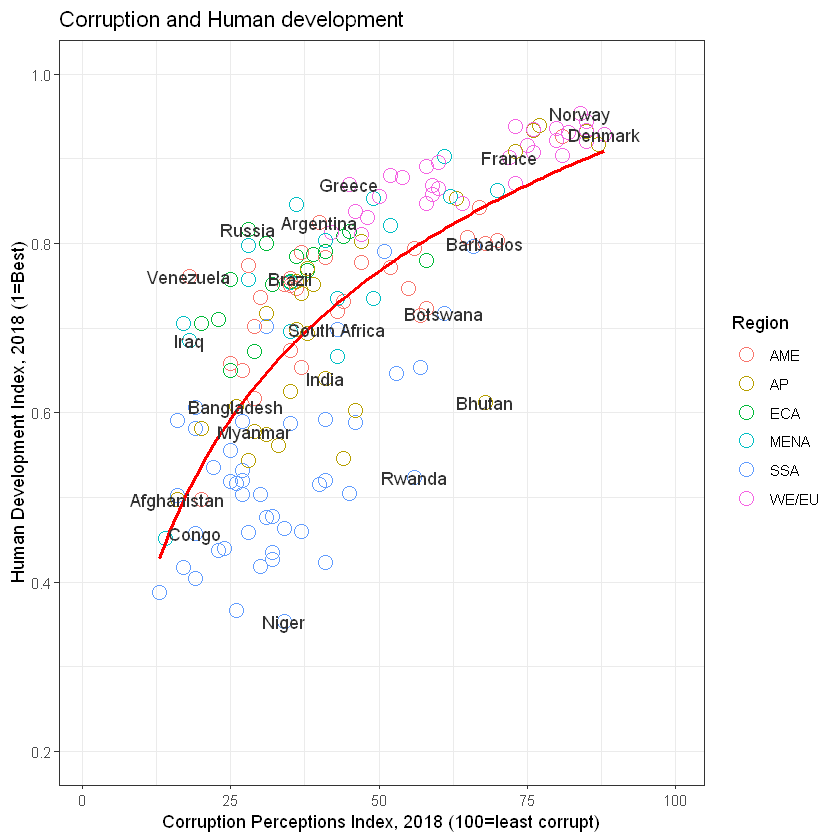

In [16]:
pl6 + ggtitle("Corruption and Human development")

package 'ggthemes' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Mamun\AppData\Local\Temp\Rtmp0sSLLo\downloaded_packages


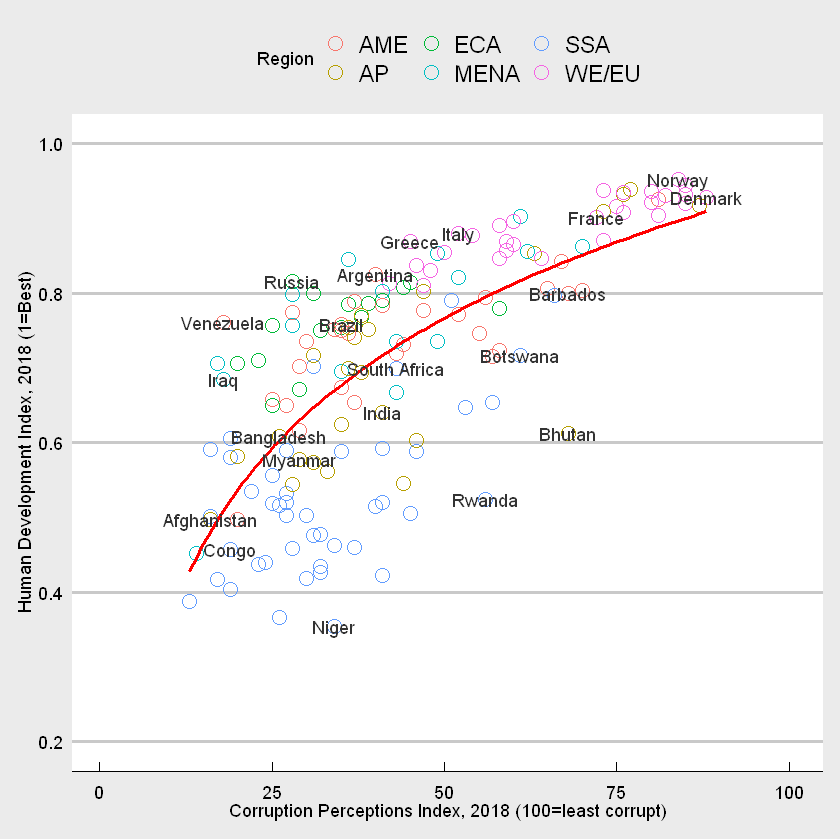

In [17]:
install.packages("ggthemes")
library("ggthemes")
pl6 + theme_economist_white()

Comparing the corruption index with the UN's Human Development Index (a measure combining health, wealth and education), demonstrates an interesting connection. When the corruption index is between approximately 20.0 and 40.0 there appears to be little relationship with the human development index, but as it rises beyond 4.0 a stronger connection can be seen.  Outliers include small but well-run poorer countries such as Afganistan and Congo, while Greece, Italy stand out among the richer countries and Finland, Norway stand out among the richest countiesties. 